### Sentiment Analysis 

In [1]:
#importing packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np 
import string
import spacy

from nltk.corpus import stopwords
import re

import nltk

# Avoid warnings
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("Product_details.csv")
df

,Text_ID,Product_Description,Product_Type,Sentiment
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2
2,8212,Crazy that Apple is opening a temporary store ...,9,2
3,4422,The lesson from Google One Pass: In this digit...,9,2
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2
...,...,...,...,...
6359,2945,Thanks @mention for hosting this event #sxsw #...,9,2
6360,4528,"SXSW iPhone app is awesome, but iPad app crash...",7,1
6361,6526,RT @mention RT @mention Download 20+ free trac...,9,2
6362,2110,OH at Texas Social Media Awards: 'You don't ne...,9,2


In [3]:
df.shape

(6364, 4)

In [4]:
df['Product_Description'].unique

<bound method Series.unique of 0       The Web DesignerÛªs Guide to iOS (and Android...
1       RT @mention Line for iPad 2 is longer today th...
2       Crazy that Apple is opening a temporary store ...
3       The lesson from Google One Pass: In this digit...
4       RT @mention At the panel: &quot;Your mom has a...
                              ...                        
6359    Thanks @mention for hosting this event #sxsw #...
6360    SXSW iPhone app is awesome, but iPad app crash...
6361    RT @mention RT @mention Download 20+ free trac...
6362    OH at Texas Social Media Awards: 'You don't ne...
6363    #Google launching a &quot;major&quot; new soci...
Name: Product_Description, Length: 6364, dtype: object>

In [5]:
# Fetching the reqiuired Columns

df_1 = df.iloc[:,1:4]
df_1

,Product_Description,Product_Type,Sentiment
0,The Web DesignerÛªs Guide to iOS (and Android...,9,2
1,RT @mention Line for iPad 2 is longer today th...,9,2
2,Crazy that Apple is opening a temporary store ...,9,2
3,The lesson from Google One Pass: In this digit...,9,2
4,RT @mention At the panel: &quot;Your mom has a...,9,2
...,...,...,...
6359,Thanks @mention for hosting this event #sxsw #...,9,2
6360,"SXSW iPhone app is awesome, but iPad app crash...",7,1
6361,RT @mention RT @mention Download 20+ free trac...,9,2
6362,OH at Texas Social Media Awards: 'You don't ne...,9,2


# Data Preprocessing

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Product_Description  6364 non-null   object
 1   Product_Type         6364 non-null   int64 
 2   Sentiment            6364 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 149.3+ KB


In [7]:
#checking null values  
df_1.isnull().sum()

Product_Description    0
Product_Type           0
Sentiment              0
dtype: int64

In [8]:
df_1.describe()

,Product_Type,Sentiment
count,6364.000000,6364.000000
mean,7.462445,2.230673
std,2.440492,0.638413
min,0.000000,0.000000
25%,6.000000,2.000000
50%,9.000000,2.000000
75%,9.000000,3.000000
max,9.000000,3.000000


In [9]:
#counts of every rating 
df_1['Product_Type'].value_counts()

9    4070
6     665
2     465
7     327
3     300
5     213
8     194
1      59
0      52
4      19
Name: Product_Type, dtype: int64

In [10]:
#counts of every rating 
df_1['Sentiment'].value_counts()

2    3765
3    2089
1     399
0     111
Name: Sentiment, dtype: int64

In [11]:
df_1['Product_Description'].duplicated

<bound method Series.duplicated of 0       The Web DesignerÛªs Guide to iOS (and Android...
1       RT @mention Line for iPad 2 is longer today th...
2       Crazy that Apple is opening a temporary store ...
3       The lesson from Google One Pass: In this digit...
4       RT @mention At the panel: &quot;Your mom has a...
                              ...                        
6359    Thanks @mention for hosting this event #sxsw #...
6360    SXSW iPhone app is awesome, but iPad app crash...
6361    RT @mention RT @mention Download 20+ free trac...
6362    OH at Texas Social Media Awards: 'You don't ne...
6363    #Google launching a &quot;major&quot; new soci...
Name: Product_Description, Length: 6364, dtype: object>

In [12]:
df_1['Product_Description'].duplicated().sum()

12

In [13]:
df_1.drop_duplicates(subset=['Product_Description'])

,Product_Description,Product_Type,Sentiment
0,The Web DesignerÛªs Guide to iOS (and Android...,9,2
1,RT @mention Line for iPad 2 is longer today th...,9,2
2,Crazy that Apple is opening a temporary store ...,9,2
3,The lesson from Google One Pass: In this digit...,9,2
4,RT @mention At the panel: &quot;Your mom has a...,9,2
...,...,...,...
6359,Thanks @mention for hosting this event #sxsw #...,9,2
6360,"SXSW iPhone app is awesome, but iPad app crash...",7,1
6361,RT @mention RT @mention Download 20+ free trac...,9,2
6362,OH at Texas Social Media Awards: 'You don't ne...,9,2


In [14]:
df_1['Product_Description'].duplicated

<bound method Series.duplicated of 0       The Web DesignerÛªs Guide to iOS (and Android...
1       RT @mention Line for iPad 2 is longer today th...
2       Crazy that Apple is opening a temporary store ...
3       The lesson from Google One Pass: In this digit...
4       RT @mention At the panel: &quot;Your mom has a...
                              ...                        
6359    Thanks @mention for hosting this event #sxsw #...
6360    SXSW iPhone app is awesome, but iPad app crash...
6361    RT @mention RT @mention Download 20+ free trac...
6362    OH at Texas Social Media Awards: 'You don't ne...
6363    #Google launching a &quot;major&quot; new soci...
Name: Product_Description, Length: 6364, dtype: object>

# Visualizations 

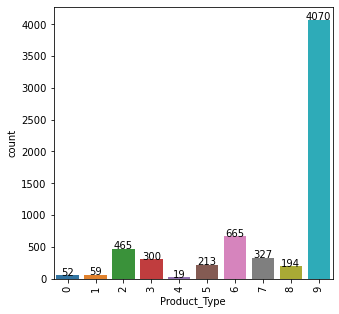

In [15]:
# Lets Display Count on top of countplot

fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Product_Type', data=df)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

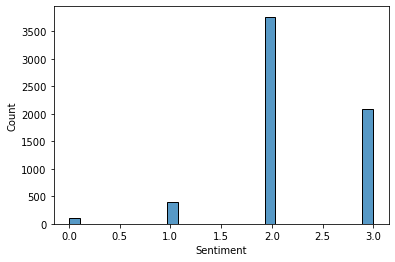

In [16]:
sns.histplot(df_1['Sentiment'])
plt.show()

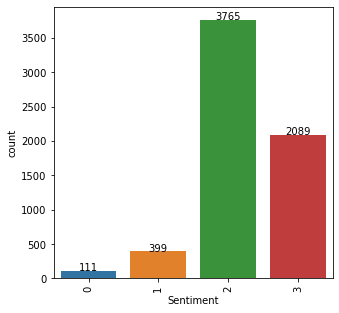

In [17]:
# Lets Display Count on top of countplot

fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Sentiment', data=df)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


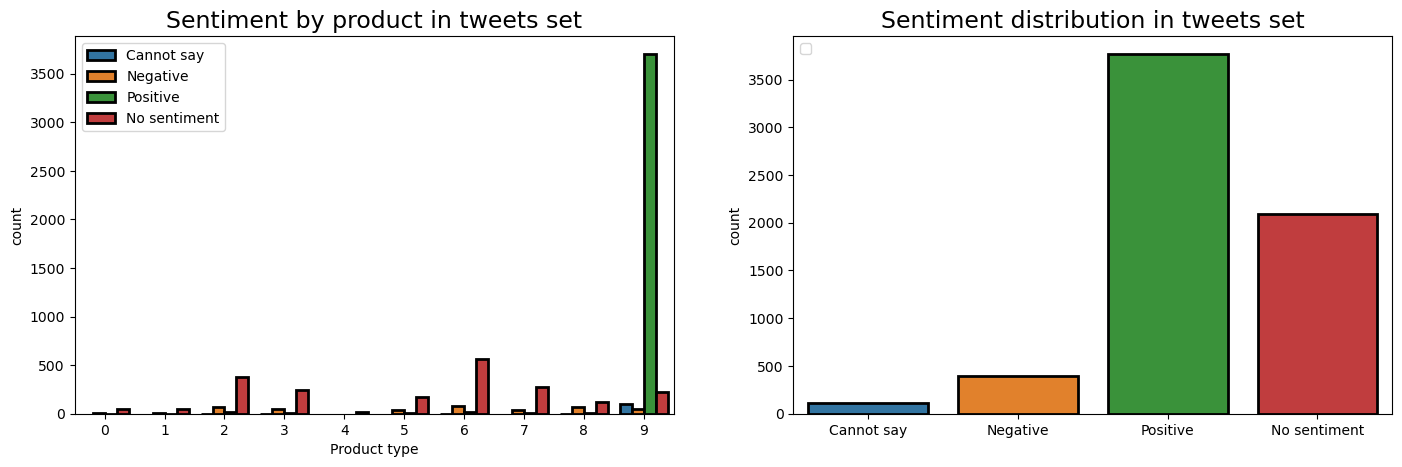

In [18]:
fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(17,5))
sns.countplot(data= df,x="Product_Type",hue="Sentiment",edgecolor="black",ax=ax[0],linewidth=2)
ax[0].legend(loc="upper left",labels=["Cannot say","Negative","Positive","No sentiment"])
ax[0].set_title('Sentiment by product in tweets set',size=17)
ax[0].set_xlabel("Product type")

sns.countplot(data = df,x="Sentiment",edgecolor="black",ax=ax[1],linewidth=2)
ax[1].legend(loc="upper left")
ax[1].set_title('Sentiment distribution in tweets set',size=17)
ax[1].set_xticklabels(["Cannot say","Negative","Positive","No sentiment"])
ax[1].set_xlabel("")

plt.show() 

# Text Preprocessing

In [19]:
#to analyze the data we are a replicating the dataframe as amazon to store more columns but it won't distrub the main dataset
df_analysis = df_1.copy()

In [20]:
#Count number of characters in single tweet
df_analysis['char_count'] = df_analysis['Product_Description'].str.len() ## this also includes spaces
df_analysis[['Product_Description','char_count']]

,Product_Description,char_count
0,The Web DesignerÛªs Guide to iOS (and Android...,89
1,RT @mention Line for iPad 2 is longer today th...,119
2,Crazy that Apple is opening a temporary store ...,111
3,The lesson from Google One Pass: In this digit...,137
4,RT @mention At the panel: &quot;Your mom has a...,87
...,...,...
6359,Thanks @mention for hosting this event #sxsw #...,70
6360,"SXSW iPhone app is awesome, but iPad app crash...",66
6361,RT @mention RT @mention Download 20+ free trac...,116
6362,OH at Texas Social Media Awards: 'You don't ne...,106


In [21]:
#count of special charaters in the text  
df_analysis['punctuations'] = df_analysis['Product_Description'].apply(lambda x: len([x for x in x.split() if x.startswith('[!”#$%&’()*+,-./:;<=>?@[]^_`{|}~]')]))
df_analysis[['Product_Description','punctuations']]

,Product_Description,punctuations
0,The Web DesignerÛªs Guide to iOS (and Android...,0
1,RT @mention Line for iPad 2 is longer today th...,0
2,Crazy that Apple is opening a temporary store ...,0
3,The lesson from Google One Pass: In this digit...,0
4,RT @mention At the panel: &quot;Your mom has a...,0
...,...,...
6359,Thanks @mention for hosting this event #sxsw #...,0
6360,"SXSW iPhone app is awesome, but iPad app crash...",0
6361,RT @mention RT @mention Download 20+ free trac...,0
6362,OH at Texas Social Media Awards: 'You don't ne...,0


In [22]:
#Count number of numericals present in each row
df_analysis['numerics'] = df_analysis['Product_Description'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df_analysis[['Product_Description','numerics']]

,Product_Description,numerics
0,The Web DesignerÛªs Guide to iOS (and Android...,1
1,RT @mention Line for iPad 2 is longer today th...,1
2,Crazy that Apple is opening a temporary store ...,0
3,The lesson from Google One Pass: In this digit...,0
4,RT @mention At the panel: &quot;Your mom has a...,0
...,...,...
6359,Thanks @mention for hosting this event #sxsw #...,0
6360,"SXSW iPhone app is awesome, but iPad app crash...",0
6361,RT @mention RT @mention Download 20+ free trac...,0
6362,OH at Texas Social Media Awards: 'You don't ne...,0


In [23]:
#number of stopwords in each tweet
stop = stopwords.words('english')

df_analysis['stopwords'] =df_analysis['Product_Description'].apply(lambda x: len([x for x in x.split() if x in stop]))
df_analysis[['Product_Description','stopwords']]

,Product_Description,stopwords
0,The Web DesignerÛªs Guide to iOS (and Android...,1
1,RT @mention Line for iPad 2 is longer today th...,9
2,Crazy that Apple is opening a temporary store ...,7
3,The lesson from Google One Pass: In this digit...,4
4,RT @mention At the panel: &quot;Your mom has a...,4
...,...,...
6359,Thanks @mention for hosting this event #sxsw #...,2
6360,"SXSW iPhone app is awesome, but iPad app crash...",2
6361,RT @mention RT @mention Download 20+ free trac...,1
6362,OH at Texas Social Media Awards: 'You don't ne...,4


In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
#converting all the upper case and sentence case in lower case 
df_1= df_1.apply(lambda x: x.astype(str).str.lower())

### Removing Stopwords

In [26]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','@mention']
my_stop_words.extend(sw_list)


In [27]:
#removing all the stopwords in the column 
df_1['Product_Description'] = df_1['Product_Description'].apply(lambda x: " ".join(x for x in x.split() if x not in my_stop_words))
df_1['Product_Description']

0       web designerûªs guide ios (and android) apps,...
1       line ipad 2 longer today yesterday. #sxsw // g...
2       crazy apple opening temporary store austin tom...
3       lesson google one pass: digital environment, u...
4       panel: &quot;your mom ipad, designing boomers&...
                              ...                        
6359    thanks hosting event #sxsw #sxswi #iwantacr48 ...
6360    sxsw iphone app awesome, ipad app crashes ever...
6361    download 20+ free tracks music sampler includi...
6362    oh texas social media awards: 'you need ask mo...
6363    #google launching &quot;major&quot; new social...
Name: Product_Description, Length: 6364, dtype: object

## Removing Numerics 

In [28]:
#removing number of numericals present in each row
df_1['Product_Description'] = df_1['Product_Description'].apply(lambda x: " ".join(x for x in x.split() if not x.isdigit()))
df_1['Product_Description']

0       web designerûªs guide ios (and android) apps,...
1       line ipad longer today yesterday. #sxsw // get...
2       crazy apple opening temporary store austin tom...
3       lesson google one pass: digital environment, u...
4       panel: &quot;your mom ipad, designing boomers&...
                              ...                        
6359    thanks hosting event #sxsw #sxswi #iwantacr48 ...
6360    sxsw iphone app awesome, ipad app crashes ever...
6361    download 20+ free tracks music sampler includi...
6362    oh texas social media awards: 'you need ask mo...
6363    #google launching &quot;major&quot; new social...
Name: Product_Description, Length: 6364, dtype: object

In [29]:
df_numerics=df_1.copy()

In [30]:
# all numeric removed 
df_numerics['numerics'] = df_numerics['Product_Description'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df_numerics[['Product_Description','numerics']]

,Product_Description,numerics
0,"web designerûªs guide ios (and android) apps,...",0
1,line ipad longer today yesterday. #sxsw // get...,0
2,crazy apple opening temporary store austin tom...,0
3,"lesson google one pass: digital environment, u...",0
4,"panel: &quot;your mom ipad, designing boomers&...",0
...,...,...
6359,thanks hosting event #sxsw #sxswi #iwantacr48 ...,0
6360,"sxsw iphone app awesome, ipad app crashes ever...",0
6361,download 20+ free tracks music sampler includi...,0
6362,oh texas social media awards: 'you need ask mo...,0


In [31]:
df_1['Product_Description']

0       web designerûªs guide ios (and android) apps,...
1       line ipad longer today yesterday. #sxsw // get...
2       crazy apple opening temporary store austin tom...
3       lesson google one pass: digital environment, u...
4       panel: &quot;your mom ipad, designing boomers&...
                              ...                        
6359    thanks hosting event #sxsw #sxswi #iwantacr48 ...
6360    sxsw iphone app awesome, ipad app crashes ever...
6361    download 20+ free tracks music sampler includi...
6362    oh texas social media awards: 'you need ask mo...
6363    #google launching &quot;major&quot; new social...
Name: Product_Description, Length: 6364, dtype: object

In [32]:
#rare words counts
freq = pd.Series(' '.join(df_1['Product_Description']).split()).value_counts()[-10:]
freq

cheering             1
selective            1
#posterous_events    1
follow,              1
1:30-2:30pm.         1
meetup,              1
sns                  1
95%,                 1
now!!                1
be...                1
dtype: int64

In [33]:
#rare words removal
freq = list(freq.index)
df_1['Product_Description'] = df_1['Product_Description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_1['Product_Description'].head()

0    web designerûªs guide ios (and android) apps,...
1    line ipad longer today yesterday. #sxsw // get...
2    crazy apple opening temporary store austin tom...
3    lesson google one pass: digital environment, u...
4    panel: &quot;your mom ipad, designing boomers&...
Name: Product_Description, dtype: object

In [34]:
df_1

,Product_Description,Product_Type,Sentiment
0,"web designerûªs guide ios (and android) apps,...",9,2
1,line ipad longer today yesterday. #sxsw // get...,9,2
2,crazy apple opening temporary store austin tom...,9,2
3,"lesson google one pass: digital environment, u...",9,2
4,"panel: &quot;your mom ipad, designing boomers&...",9,2
...,...,...,...
6359,thanks hosting event #sxsw #sxswi #iwantacr48 ...,9,2
6360,"sxsw iphone app awesome, ipad app crashes ever...",7,1
6361,download 20+ free tracks music sampler includi...,9,2
6362,oh texas social media awards: 'you need ask mo...,9,2


In [35]:
df_1['Product_Description'].isnull().sum()

0

In [36]:
#removing all the emojis present in the text 
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df_1['Product_Description'] = df_1['Product_Description'].apply(lambda x: remove_emoji(x))


In [37]:
df_1['Product_Description'] 

0       web designerûªs guide ios (and android) apps,...
1       line ipad longer today yesterday. #sxsw // get...
2       crazy apple opening temporary store austin tom...
3       lesson google one pass: digital environment, u...
4       panel: &quot;your mom ipad, designing boomers&...
                              ...                        
6359    thanks hosting event #sxsw #sxswi #iwantacr48 ...
6360    sxsw iphone app awesome, ipad app crashes ever...
6361    download 20+ free tracks music sampler includi...
6362    oh texas social media awards: 'you need ask mo...
6363    #google launching &quot;major&quot; new social...
Name: Product_Description, Length: 6364, dtype: object

### Stemming 

In [38]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df_1['Product_Description'] [:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    web designerûª guid io (and android) apps, to...
1    line ipad longer today yesterday. #sxsw // get...
2    crazi appl open temporari store austin tomorro...
3    lesson googl one pass: digit environment, user...
4    panel: &quot;your mom ipad, design boomers&quo...
Name: Product_Description, dtype: object

In [39]:
from textblob import Word
from textblob import TextBlob

### Lemmatization

In [40]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [41]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
df_1['Product_Description']  = df_1['Product_Description'] .apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df_1['Product_Description'] .head()

0    web designerûªs guide io (and android) apps, ...
1    line ipad longer today yesterday. #sxsw // get...
2    crazy apple opening temporary store austin tom...
3    lesson google one pass: digital environment, u...
4    panel: &quot;your mom ipad, designing boomers&...
Name: Product_Description, dtype: object

### Sentiment Analysis for each review/description

In [43]:
df_1['Product_Description'][:10].apply(lambda x: TextBlob(x).sentiment)


0                                    (0.0, 0.0)
1                                    (0.3, 0.2)
2                                   (-0.6, 0.9)
3                                    (0.0, 0.0)
4                                    (0.0, 0.0)
5                                   (-0.5, 0.7)
6                                    (0.0, 0.0)
7    (0.041666666666666664, 0.3923076923076923)
8     (0.05656565656565656, 0.5070707070707071)
9                                    (0.7, 0.7)
Name: Product_Description, dtype: object

In [44]:
df_1['sentiment'] = df_1['Product_Description'].apply(lambda x: TextBlob(x).sentiment[0] )
df_1[['Product_Description','sentiment']]

,Product_Description,sentiment
0,"web designerûªs guide io (and android) apps, ...",0.000000
1,line ipad longer today yesterday. #sxsw // get...,0.300000
2,crazy apple opening temporary store austin tom...,-0.600000
3,"lesson google one pass: digital environment, u...",0.000000
4,"panel: &quot;your mom ipad, designing boomers&...",0.000000
...,...,...
6359,thanks hosting event #sxsw #sxswi #iwantacr48 ...,0.200000
6360,"sxsw iphone app awesome, ipad app crash every ...",1.000000
6361,download 20+ free track music sampler includin...,0.500000
6362,oh texas social medium awards: 'you need ask m...,0.033333


In [45]:
df_1

,Product_Description,Product_Type,Sentiment,sentiment
0,"web designerûªs guide io (and android) apps, ...",9,2,0.000000
1,line ipad longer today yesterday. #sxsw // get...,9,2,0.300000
2,crazy apple opening temporary store austin tom...,9,2,-0.600000
3,"lesson google one pass: digital environment, u...",9,2,0.000000
4,"panel: &quot;your mom ipad, designing boomers&...",9,2,0.000000
...,...,...,...,...
6359,thanks hosting event #sxsw #sxswi #iwantacr48 ...,9,2,0.200000
6360,"sxsw iphone app awesome, ipad app crash every ...",7,1,1.000000
6361,download 20+ free track music sampler includin...,9,2,0.500000
6362,oh texas social medium awards: 'you need ask m...,9,2,0.033333


## Generate Positive Reviews Word Cloud

In [46]:
# from wordcloud import WordCloud
# wc = WordCloud(width=500,height=500,min_font_size=10,max_words=300,background_color='black')

In [47]:
# Positive = wc.generate(df_1[df_1['Polarity']>0]['Product_Description'].str.cat(sep=""))

In [48]:
# plt.figure(figsize=(10,10))
# plt.imshow(Positive)
# plt.title('Positive Reviews')
# plt.show()

## Generate Negative Reviews Word Cloud

In [49]:
# Negative=wc.generate(df_1[df_1['Polarity']<0]['Product_Description'].str.cat(sep=""))

In [50]:
# plt.figure(figsize=(10,10))
# plt.imshow(Negative)
# plt.title('Negative Reviews')
# plt.show()

## Generate Neutral Reviews Word Cloud

In [51]:
# Neutral = wc.generate(df_1[df_1['Polarity']==0]['Product_Description'].str.cat(sep=""))

In [52]:
# plt.figure(figsize=(10,10))
# plt.imshow(Neutral)
# plt.title('Neutral Reviews')
# plt.show()

# Model Building 

In [53]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
vectorizer=TfidfVectorizer(max_features=10000)

In [54]:
x=vectorizer.fit_transform(df_1['Product_Description'],df_1['Product_Type'])

In [55]:
#rows, reviews
x.shape

(6364, 7952)

In [56]:
x

<6364x7952 sparse matrix of type '<class 'numpy.float64'>'
	with 70765 stored elements in Compressed Sparse Row format>

### LabelEncoder for classification Model

In [57]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [58]:
df_1['target']=encoder.fit_transform(df_1['Sentiment'])
df_1

,Product_Description,Product_Type,Sentiment,sentiment,target
0,"web designerûªs guide io (and android) apps, ...",9,2,0.000000,2
1,line ipad longer today yesterday. #sxsw // get...,9,2,0.300000,2
2,crazy apple opening temporary store austin tom...,9,2,-0.600000,2
3,"lesson google one pass: digital environment, u...",9,2,0.000000,2
4,"panel: &quot;your mom ipad, designing boomers&...",9,2,0.000000,2
...,...,...,...,...,...
6359,thanks hosting event #sxsw #sxswi #iwantacr48 ...,9,2,0.200000,2
6360,"sxsw iphone app awesome, ipad app crash every ...",7,1,1.000000,1
6361,download 20+ free track music sampler includin...,9,2,0.500000,2
6362,oh texas social medium awards: 'you need ask m...,9,2,0.033333,2


In [59]:
y = df_1['target']
y

0       2
1       2
2       2
3       2
4       2
       ..
6359    2
6360    1
6361    2
6362    2
6363    2
Name: target, Length: 6364, dtype: int32

In [60]:
from sklearn.model_selection import train_test_split   

In [61]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

### Model Building

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#### 1. Linear SVC

In [64]:
from sklearn.svm import LinearSVC
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)


LinearSVC(random_state=42)

In [65]:
from sklearn.metrics import accuracy_score
y_pred = lin_clf.predict(X_train)
print(accuracy_score(y_train, y_pred)*100)

93.51145038167938


In [66]:
print(lin_clf)

LinearSVC(random_state=42)


In [67]:
# make predictions for test data
y_pred = lin_clf.predict(X_test)
predictions_LSVC = [round(value) for value in y_pred]

In [68]:
# evaluate predictions
accuracy_lsvc = accuracy_score(y_test, predictions_LSVC)
print("Accuracy: %.2f%%" % (accuracy_lsvc * 100.0))

Accuracy: 66.02%


In [69]:
print(classification_report(predictions_LSVC,y_test))

              precision    recall  f1-score   support

           0       0.06      0.14      0.09        14
           1       0.16      0.66      0.26        32
           2       0.82      0.69      0.75      1334
           3       0.50      0.60      0.55       530

    accuracy                           0.66      1910
   macro avg       0.39      0.52      0.41      1910
weighted avg       0.72      0.66      0.68      1910



#### 2. XGBoost (Extreme Gradient Boosting)

In [70]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [71]:
y_train

5523    3
5736    3
2421    2
107     2
3245    3
       ..
5426    3
3064    2
6309    3
6151    3
3398    2
Name: target, Length: 4454, dtype: int32

In [107]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [108]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)


In [109]:
xgb_classifier = XGBClassifier()


In [110]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=df_1["Sentiment"]
)

xgb_classifier.fit(x, y, sample_weight=classes_weights)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [76]:
from sklearn.utils.class_weight import compute_sample_weight


In [77]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()

In [111]:
# make predictions for test data
y_pred = xgb_classifier.predict(X_test)
pred_xg = [round(value) for value in y_pred]

In [112]:
# evaluate predictions
accuracy_xg = accuracy_score(y_test, pred_xg)
print("Accuracy score using XGBoost: %.2f%%" % (accuracy_xg * 100.0))

Accuracy score using XGBoost: 80.63%


In [113]:
print(classification_report(pred_xg,y_test))

              precision    recall  f1-score   support

           0       1.00      0.53      0.70        60
           1       0.99      0.60      0.75       219
           2       0.78      0.89      0.84       982
           3       0.80      0.77      0.78       649

    accuracy                           0.81      1910
   macro avg       0.89      0.70      0.77      1910
weighted avg       0.82      0.81      0.80      1910



#### 3. Bagging Boosting

In [114]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import accuracy_score#importing metrics for accuracy calculation (confusion matrix)
from sklearn.ensemble import BaggingClassifier#bagging combines the results of multipls models to get a generalized result. 
from sklearn.ensemble import AdaBoostClassifier #boosting method attempts to correct the errors of previous models.
from sklearn.metrics import classification_report, confusion_matrix

In [115]:
dcmodel =  BaggingClassifier(DecisionTreeClassifier(max_depth = 5), random_state=42) #decision tree classifier object
dcmodel =  AdaBoostClassifier(DecisionTreeClassifier(max_depth = 5), random_state=42) #decision tree classifier object

In [116]:
dcmodel = dcmodel.fit(X_train,y_train) #train decision tree
pred_bag = dcmodel.predict(X_test)

In [117]:
accuracy_bag = accuracy_score(y_test,pred_bag)*100

In [118]:
print("Accuracy score using Bagging Boosting: %.2f%%" % (accuracy_bag))

Accuracy score using Bagging Boosting: 55.76%


In [119]:
print(classification_report(pred_bag,y_test))

              precision    recall  f1-score   support

           0       0.06      0.17      0.09        12
           1       0.12      0.22      0.16        73
           2       0.75      0.63      0.68      1344
           3       0.33      0.43      0.37       481

    accuracy                           0.56      1910
   macro avg       0.32      0.36      0.33      1910
weighted avg       0.62      0.56      0.58      1910



#### 4. Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [121]:
rf = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=15,criterion="entropy")

In [122]:
rf.fit(X_train,y_train) # Fitting RandomForestClassifier model from sklearn.ensemble 
rf.estimators_ # 
rf.classes_ # class labels (output)
rf.n_classes_ # Number of levels in class labels 
rf.n_features_  # Number of input features in model 8 here.

rf.n_outputs_ # Number of outputs when fit performed

print(rf.oob_score_*100) 

62.55051638976201


In [123]:
rf.predict(X_test)

array([2, 3, 3, ..., 3, 2, 3])

In [124]:
pred_random = rf.predict(X_test)
pd.Series(pred_random).value_counts()

2    1535
3     342
1      23
0      10
dtype: int64

In [125]:
pred_random

array([2, 3, 3, ..., 3, 2, 3])

In [126]:
# In order to check whether the predictions are correct or wrong we will create a cross tab on y_test data

crosstable = pd.crosstab(y_test,pred_random)
crosstable

col_0,0,1,2,3
target,,,,
0,2,3,24,3
1,1,14,104,13
2,6,6,995,112
3,1,0,412,214


In [127]:
# Final step we will calculate the accuracy of our model

# We are comparing the predicted values with the actual values and calculating mean for the matches
np.mean(pred_random==y_test)*100

64.13612565445025

In [128]:
print(classification_report(pred_random,y_test))

              precision    recall  f1-score   support

           0       0.06      0.20      0.10        10
           1       0.11      0.61      0.18        23
           2       0.89      0.65      0.75      1535
           3       0.34      0.63      0.44       342

    accuracy                           0.64      1910
   macro avg       0.35      0.52      0.37      1910
weighted avg       0.78      0.64      0.68      1910



#### 5. SVC

In [129]:
from sklearn.svm import SVC
from sklearn import svm

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [130]:
# clf = SVC()
# param_grid = [{'kernel':['rbf'],'gamma':[25,20,10,1,0.5],'C':[20,15,14,13,12,11,10,0.1,0.001] }]
# gsv = GridSearchCV(clf,param_grid,cv=10)


In [131]:
# gsv.fit(X_train, y_train)

In [132]:
# gsv.best_params_ , gsv.best_score_ 

In [133]:
clf = SVC(C= 11, gamma = 1, kernel = 'rbf')
clf.fit(X_train , y_train)
pred_svc = clf.predict(X_test)
acc_svc = accuracy_score(y_test, pred_svc) * 100
print("Accuracy =", acc_svc)
confusion_matrix(y_test, pred_svc)

Accuracy = 65.60209424083769


array([[  2,   3,  20,   7],
       [  2,  17,  96,  17],
       [  8,   4, 953, 154],
       [  2,   1, 343, 281]], dtype=int64)

In [134]:
print(classification_report(pred_svc,y_test))

              precision    recall  f1-score   support

           0       0.06      0.14      0.09        14
           1       0.13      0.68      0.22        25
           2       0.85      0.67      0.75      1412
           3       0.45      0.61      0.52       459

    accuracy                           0.66      1910
   macro avg       0.37      0.53      0.39      1910
weighted avg       0.74      0.66      0.68      1910



In [148]:
print("Accuracy score using XGBoost               : %.2f%%" % (accuracy_xg * 100.0))
print("Accuracy score using Bagging Boosting:     : %.2f%%" % (accuracy_bag))
print("Accuracy score using Random Forest         : %.2f%%" % (rf.oob_score_*100))
print("Accuracy score using SVC_best params       : %.2f%%" % (acc_svc))

Accuracy score using XGBoost               : 80.63%
Accuracy score using Bagging Boosting:     : 55.76%
Accuracy score using Random Forest         : 62.55%
Accuracy score using SVC_best params       : 65.60%


In [142]:
# saving the model 
import pickle 
pickle_out = open("model.pkl", mode = "wb") 
pickle.dump(xgb_classifier, pickle_out) 
pickle_out.close()